<a href="https://colab.research.google.com/github/j7tfj7f8k1f/Automatic-testing-tools/blob/main/ECG_Heartbeat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 請先閱讀https://ieeexplore.ieee.org/abstract/document/8952723 論文並且回答以下內容


## 1. What are the pros and cons of the model presented in this paper?

優點 (Pros):

高分類準確度: 該模型在心律不整分類方面表現出色，特別是針對心室早期收縮 (VEB) 和心室上性早期收縮 (SVEB) 的分類，靈敏度和陽性預測值都達到非常高的水平。整體準確度也高達 99.43%。

改進的 CNN 架構: 模型採用了耦合卷積層結構，這種結構比傳統的單層卷積層更能捕捉複雜的心電訊號特徵，從而提高了分類性能。

採用 Dropout 機制: 透過使用 Dropout 技術，有效地防止了模型過擬合，提高了模型的泛化能力和穩定性，使其在未知的數據上也能表現良好。

良好的穩定性: 在重複 20 次的實驗中，模型的整體準確度都保持在 99.4% 左右，訓練時間也相對穩定，顯示模型具有良好的學習穩定性。

快速的訓練時間: 模型訓練速度快，對 107679 個樣本進行訓練大約只需要 4 分鐘，這使得模型更易於實際應用。

適用於穿戴式裝置: 該模型可以直接應用於穿戴式設備，以便長期監測心電數據，這對於心律不整的早期發現和管理具有重要意義。

可針對多導聯數據進行調整: 雖然論文中僅使用 MLII 導聯的數據進行訓練，但模型結構可以調整以適應多導聯心電圖數據，這使得模型更具彈性。



缺點 (Cons):

依賴正確的 R 波偵測: 該模型的前提是能正確偵測 R 波的位置，然而，在實際的 Holter 監測中，可能會出現干擾，影響 R 波偵測的準確性，進而影響模型的分類性能。

未來的 R 波偵測研究需求: 論文作者也承認需要進一步研究更穩健且高準確性的 R 波偵測算法，以確保模型在各種實際情況下的可靠性。

訓練數據的局限性: 雖然使用了 MIT-BIH 心律失常數據庫進行訓練，但該數據庫的採樣頻率為 360 Hz，實際應用中可能需要處理不同採樣頻率的數據，這可能需要重新採樣或進一步調整模型。

可能需要針對新數據進行微調: 在實際應用中，如果遇到與訓練數據分布差異較大的新數據，可能需要對模型進行微調，以確保其性能。

模型的可解釋性: 雖然 CNN 模型具有很高的分類性能，但其內部運作機制比較複雜，缺乏可解釋性，這可能會在某些應用場景中造成不便。

## 2. How many different layers are used in the model, and what is the function of each layer?

1. 卷積層 (Convolutional Layers, C1, C2, C3)

功能： 卷積層是模型的基礎，主要用於提取輸入訊號中的局部特徵。

運作方式： 每個卷積層都使用一個小的卷積核 (Kernel) 在輸入訊號上滑動，計算卷積核與輸入訊號的點積，生成特徵圖 (Feature Map)。不同的卷積核可以提取不同的特徵，例如邊緣、紋理等。

論文中的應用： 論文中使用了三個卷積層 (C1, C2, C3)，每層的卷積核大小和數量都不同，目的是從心電訊號中提取不同層次的特徵。

2. 次採樣層 (Subsampling Layers, S1, S2)

功能： 次採樣層，也稱為池化層 (Pooling Layer)，主要用於降低特徵圖的維度，減少計算量，同時保留重要特徵。

運作方式： 次採樣層將輸入的特徵圖分成小的區域，然後在每個區域中選擇一個代表性的值，例如最大值 (Max Pooling) 或平均值 (Average Pooling)。

論文中的應用： 論文中使用了兩個次採樣層 (S1, S2)，目的是縮減特徵圖的尺寸，降低計算複雜度，並增加模型的平移不變性。

3. 全連接層 (Fully Connected Layers, FC1, FC2)

功能： 全連接層主要用於將提取出的特徵進行整合，並將其映射到最終的分類結果。

運作方式： 全連接層中的每個神經元都與前一層的所有神經元相連，每個連接都有一個權重。全連接層通過學習這些權重，建立輸入特徵與分類結果之間的非線性關係。

論文中的應用： 論文中使用了兩個全連接層 (FC1, FC2)，用於將卷積層和次採樣層提取的特徵映射到不同的心律失常類別。

4. Softmax 層 (Softmax Layer)

功能： Softmax 層是模型的最後一層，主要用於將全連接層的輸出轉換為機率分布，表示每個類別的可能性。

運作方式： Softmax 函數將每個類別的輸出值映射到 0 到 1 之間，並且所有類別的機率總和為 1。

論文中的應用： 論文中使用 Softmax 層輸出 5 種心律失常類別的機率值，選擇機率最高的類別作為模型的最終預測結果。

## 3. How do you imporve this model?

1. 提升 R 波偵測的準確性和魯棒性：

更先進的 R 波偵測算法： 論文中提到模型依賴於正確的 R 波偵測。可以採用更先進的 R 波偵測算法，例如基於小波變換、深度學習的 R 波偵測模型等，來提高 R 波偵測的準確性和魯棒性，減少誤判的影響。

R 波偵測的獨立模型： 可以考慮將 R 波偵測作為一個獨立的模塊，先行處理心電訊號，然後將偵測到的 R 波位置輸入到分類模型中。這樣可以將 R 波偵測與分類任務解耦，提高整體系統的可靠性。

加入噪聲抑制： 針對 Holter 監測中常見的各種噪聲，可以在 R 波偵測模塊中加入噪聲抑制算法，例如濾波器、去噪自編碼器等，以提高 R 波偵測在噪聲環境下的性能。

2. 模型架構的改進(實作res效果比論文好)：

更深或更寬的網路： 可以嘗試增加模型的深度 (層數) 或寬度 (每層的神經元數量)，來提升模型的表達能力，捕捉更複雜的心電訊號特徵。例如，使用 ResNet、DenseNet 等更先進的網路結構。

注意力機制 (Attention Mechanism)： 可以引入注意力機制，讓模型更加關注心電訊號中重要的區域，例如 QRS 波群、T 波等。這樣可以提高模型對關鍵特徵的敏感度，從而提升分類性能。

時序建模： 心電訊號是時間序列數據，可以考慮使用 RNN (循環神經網路) 或 Transformer 等模型來建模時間序列的依賴關係，這可以幫助模型捕捉心律失常的時間特徵。

3. 數據增強(數據增強實作只多用一種smote)：

多樣化的數據增強： 可以通過平移、縮放、添加噪聲、時間扭曲等方法對心電訊號進行數據增強，以增加訓練數據的多樣性，提高模型的泛化能力。

使用生成對抗網路 (GAN) 生成心電訊號： 可以利用 GAN 生成更多樣化的心電數據，特別是針對少數類別的心律失常，可以有效地擴充數據集，緩解類別不平衡問題。

4. 訓練策略的優化(實作我幾乎都用ADAMW)：

自適應學習率調整： 可以採用自適應學習率調整算法，例如 AdamW、RAdam 等，可以根據訓練的進度調整學習率，加速訓練並獲得更好的收斂效果。

更先進的正規化方法： 除了 Dropout，可以嘗試使用其他的正規化方法，例如 Batch Normalization、Layer Normalization 等，以提高模型的穩定性和泛化能力。

集成學習(最後集成了4個模型)： 可以考慮訓練多個模型，然後通過投票、平均等方法進行集成學習，提高模型的整體性能。

5. 針對實際應用的調整：

多導聯數據的應用： 可以將模型擴展到多導聯心電數據，提高模型的判斷準確性。

模型輕量化： 針對穿戴式設備等資源受限的應用場景，可以對模型進行輕量化處理，例如使用模型壓縮、剪枝、量化等技術，降低模型的計算量和內存消耗。

可解釋性研究： 可以對模型的可解釋性進行研究，例如使用 Grad-CAM 等方法來可視化模型關注的區域，幫助理解模型的決策依據。

### 實作

## 步驟 1：從 Kaggle 下載 MIT-BIH 心律不整資料集。 https://www.kaggle.com/datasets/shayanfazeli/heartbeat

## 提示：召回率和特異性是醫療應用中最重要的指標之一。目標是兩個指標都達到 95%（平均值）。
## 目標=9500*5=47500

## 工具

In [ ]:
!pip install PyWavelets imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.7 MB/s eta 0:00:00


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

100%|██████████| 98.8M/98.8M [00:05<00:00, 19.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1


## 如果只是要看結果請直接下載 xgb lgbm gru resnet現成

In [ ]:
!gdown 1t68qGJbNt-yZepxvOrbSWLg4g185gVyV
!gdown 1F0TF6YRoA26T7vcn5Hsemlpd3PTbsoZJ
!gdown 1WoUAtLXl65chNd2bwR531wioQeC_enrL
!gdown 1zGQxe3K6GFyTcIqC3VxtTpFiiIlSMk6n

Downloading...
From: https://drive.google.com/uc?id=1t68qGJbNt-yZepxvOrbSWLg4g185gVyV
To: /content/heartbeat_xgboost_model.pkl
100% 2.09M/2.09M [00:00<00:00, 37.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1F0TF6YRoA26T7vcn5Hsemlpd3PTbsoZJ
To: /content/heartbeat_lightgbm_model.pkl
100% 1.77M/1.77M [00:00<00:00, 16.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WoUAtLXl65chNd2bwR531wioQeC_enrL
To: /content/heartbeat_gru_model_optimized.h5
100% 1.94M/1.94M [00:00<00:00, 115MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zGQxe3K6GFyTcIqC3VxtTpFiiIlSMk6n
To: /content/heartbeat_cnn_model_optimized_adv.h5
100% 3.69M/3.69M [00:00<00:00, 172MB/s]


## 步驟 2:資料已經預處理好 直接訓練即可

## 目標是集成模型 我們分幾種類型模型找出最適合組合集成

## 1.CNN系列

## resnet 47450


Epoch 1/100
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 89s 19ms/step - accuracy: 0.7297 - loss: 1.0029 - val_accuracy: 0.8797 - val_loss: 0.3090
Epoch 2/100
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 127s 16ms/step - accuracy: 0.9467 - loss: 0.2150 - val_accuracy: 0.9192 - val_loss: 0.2325
Epoch 3/100
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 84s 17ms/step - accuracy: 0.9688 - loss: 0.1270 - val_accuracy: 0.9335 - val_loss: 0.2217
Epoch 4/100
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9766 - loss: 0.0963 - val_accuracy: 0.9612 - val_loss: 0.1407
Epoch 5/100
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9821 - loss: 0.0740 - val_accuracy: 0.9690 - val_loss: 0.1149
Epoch 6/100
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9848 - loss: 0.0632 - val_accuracy: 0.9773 - val_loss: 0.1013
Epoch 7/100
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9870 - loss: 0.0535 - val_accuracy: 0.9743 - val_loss: 0.1123
Epoch 8/100
4247/4247 ━━━━━━━━━━━━━━━━━━━━ 73s 17ms/step - accuracy:

優化後的模型已儲存至 heartbeat_cnn_model_optimized_adv.h5
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
混淆矩陣:
 [[8939   68   26   18    8]
 [  30  247    1    0    0]
 [  10    8  697    8    1]
 [   2    0    5   73    0]
 [   6    1    1    0  796]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas

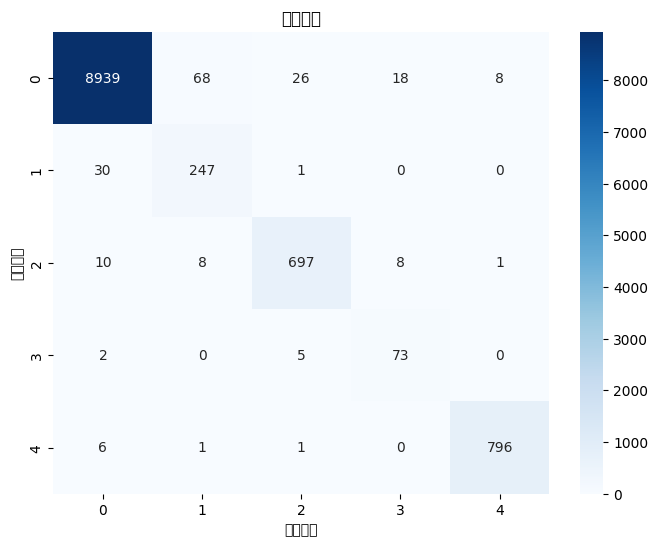

類別 0:
  精確度 (Precision): 0.9947
  召回率 (Recall): 0.9868
  特異性 (Specificity): 0.9745
  F1 分數 (F1-score): 0.9907
類別 1:
  精確度 (Precision): 0.7623
  召回率 (Recall): 0.8885
  特異性 (Specificity): 0.9928
  F1 分數 (F1-score): 0.8206
類別 2:
  精確度 (Precision): 0.9548
  召回率 (Recall): 0.9627
  特異性 (Specificity): 0.9968
  F1 分數 (F1-score): 0.9587
類別 3:
  精確度 (Precision): 0.7374
  召回率 (Recall): 0.9125
  特異性 (Specificity): 0.9976
  F1 分數 (F1-score): 0.8156
類別 4:
  精確度 (Precision): 0.9888
  召回率 (Recall): 0.9900
  特異性 (Specificity): 0.9991
  F1 分數 (F1-score): 0.9894

整體準確度 (Accuracy): 0.9824


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import random
import pywt

# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test

def build_resnet_block(input_tensor, filters, kernel_size=3, strides=1):
    """建立 ResNet 殘差區塊"""

    conv1 = layers.Conv1D(filters, kernel_size, padding='same', activation='relu', strides=strides)(input_tensor)
    conv2 = layers.Conv1D(filters, kernel_size, padding='same', activation='relu')(conv1)

    if strides != 1 or input_tensor.shape[-1] != filters:
        shortcut = layers.Conv1D(filters, 1, strides=strides)(input_tensor)
    else:
        shortcut = input_tensor

    output = layers.add([conv2, shortcut])
    output = layers.Activation('relu')(output)
    return output

def build_resnet_model(input_shape=(187, 1), num_classes=5):
    """建立 ResNet 模型"""
    input_tensor = layers.Input(shape=input_shape)

    x = layers.Conv1D(64, 7, padding='same', activation='relu')(input_tensor)
    x = layers.MaxPool1D(pool_size=2)(x)

    x = build_resnet_block(x, 64)
    x = build_resnet_block(x, 64)
    x = build_resnet_block(x, 128, strides=2)
    x = build_resnet_block(x, 128)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    output = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_tensor, outputs=output)

    return model

def time_warp(signal, sigma=0.1):
  """時間扭曲數據增強"""
  sz = signal.shape[0]
  tt = np.sort(np.random.choice(sz, int(sz*(1+sigma)), replace=False))
  t_seq = np.arange(0, sz, 1)
  return np.interp(t_seq, tt/len(tt)*sz, signal).reshape(sz)

def amplitude_scaling(signal, sigma=0.1):
  """振幅縮放數據增強"""
  scale = 1 + np.random.normal(0, sigma)
  return signal * scale

def add_random_noise(signal, sigma=0.05):
  """加入隨機噪聲數據增強"""
  noise = np.random.normal(0, sigma, size=signal.shape)
  return signal + noise

def augment_data(data, labels):
    """數據增強"""
    augmented_data = []
    augmented_labels = []

    for signal, label in zip(data, labels):

       augmented_data.append(signal)
       augmented_labels.append(label)



       # 加入振幅縮放
       augmented_data.append(amplitude_scaling(signal))
       augmented_labels.append(label)

       # 加入隨機噪聲
       augmented_data.append(add_random_noise(signal))
       augmented_labels.append(label)

    # 使用 SMOTE 進行過採樣
    smote = SMOTE(random_state=42)
    data_resampled, labels_resampled = smote.fit_resample(np.array(augmented_data).reshape(len(augmented_data), -1), augmented_labels)

    return data_resampled.reshape(len(data_resampled), data.shape[1]), np.array(labels_resampled)


if __name__ == '__main__':
    # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

     # 準備數據
    x_train = np.array(list(train_df['heartbeat']))
    y_train = np.array(list(train_df['encoded_symbol']))
    x_val = np.array(list(val_df['heartbeat']))
    y_val = np.array(list(val_df['encoded_symbol']))
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))

    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    # 數據增強
    x_train_resampled, y_train_resampled = augment_data(x_train.reshape(x_train.shape[0], x_train.shape[1]), y_train)
    x_train_resampled = x_train_resampled.reshape(x_train_resampled.shape[0], x_train_resampled.shape[1], 1)

    # 設定訓練參數
    epochs = 100  # 您可以根據需要調整 epochs 數量
    batch_size = 256  # 您可以根據需要調整 batch_size
    class_weights = {0: 1, 1: 5, 2: 1, 3: 3, 4: 1} # 調整類別權重，類別 1 和類別 3 的權重較高

    # 建立模型
    model = build_resnet_model(input_shape=x_train.shape[1:], num_classes=len(np.unique(y_train)))

     # 編譯模型
    optimizer = optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 設定 Early Stopping，並監控驗證集的準確度
    early_stopping = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

    # 訓練模型
    history = model.fit(x_train_resampled, y_train_resampled,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        class_weight=class_weights,
                        callbacks=[early_stopping]
                        )

    # 儲存模型
    model.save("heartbeat_cnn_model_optimized_adv.h5")
    print("優化後的模型已儲存至 heartbeat_cnn_model_optimized_adv.h5")

    # 載入模型
    model = tf.keras.models.load_model("heartbeat_cnn_model_optimized_adv.h5")

    # 預測測試集
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, y_pred_classes)
    print("混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('混淆矩陣')
    plt.show()

     # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, y_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
      tp = cm[label, label]
      fn = np.sum(cm[label, :]) - tp
      fp = np.sum(cm[:, label]) - tp
      tn = np.sum(cm) - tp - fn - fp

      recall = tp / (tp + fn) if (tp + fn) > 0 else 0
      specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

      print(f"類別 {label}:")
      print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
      print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
      print(f"  特異性 (Specificity): {specificity:.4f}")
      print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

    # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"\n整體準確度 (Accuracy): {accuracy:.4f}")

## cnn smote 46881

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.7865 - loss: 0.8305 - val_accuracy: 0.9058 - val_loss: 0.2706
Epoch 2/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9602 - loss: 0.1654 - val_accuracy: 0.9563 - val_loss: 0.1338
Epoch 3/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9747 - loss: 0.1024 - val_accuracy: 0.9633 - val_loss: 0.1294
Epoch 4/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9804 - loss: 0.0794 - val_accuracy: 0.9656 - val_loss: 0.1216
Epoch 5/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9840 - loss: 0.0660 - val_accuracy: 0.9679 - val_loss: 0.1120
Epoch 6/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9861 - loss: 0.0575 - val_accuracy: 0.9653 - val_loss: 0.1322
Epoch 7/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9869 - loss: 0.0554 - val_accuracy: 0.9752 - val_loss: 0.1091
Epoch 8/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 

優化後的模型已儲存至 heartbeat_cnn_model_optimized.h5
343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
混淆矩陣:
 [[8935   63   15   38    8]
 [  31  241    4    1    1]
 [  20    3  685   13    3]
 [   5    0    3   72    0]
 [   8    0    1    0  795]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas

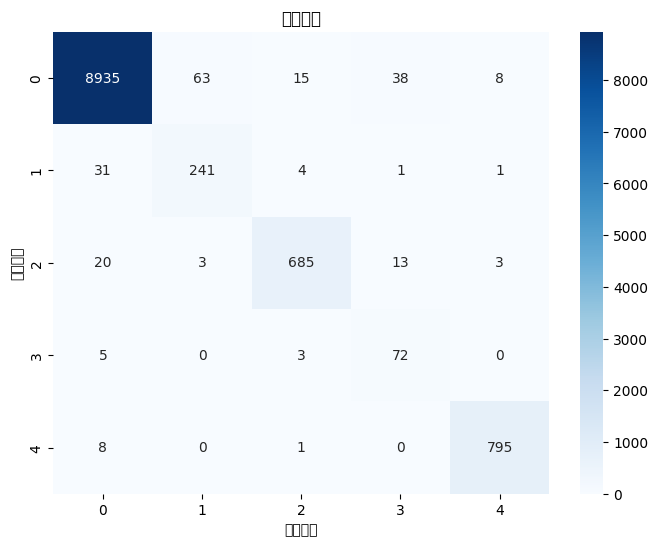

類別 0:
  精確度 (Precision): 0.9929
  召回率 (Recall): 0.9863
  特異性 (Specificity): 0.9661
  F1 分數 (F1-score): 0.9896
類別 1:
  精確度 (Precision): 0.7850
  召回率 (Recall): 0.8669
  特異性 (Specificity): 0.9938
  F1 分數 (F1-score): 0.8239
類別 2:
  精確度 (Precision): 0.9675
  召回率 (Recall): 0.9461
  特異性 (Specificity): 0.9977
  F1 分數 (F1-score): 0.9567
類別 3:
  精確度 (Precision): 0.5806
  召回率 (Recall): 0.9000
  特異性 (Specificity): 0.9952
  F1 分數 (F1-score): 0.7059
類別 4:
  精確度 (Precision): 0.9851
  召回率 (Recall): 0.9888
  特異性 (Specificity): 0.9988
  F1 分數 (F1-score): 0.9870

整體準確度 (Accuracy): 0.9802


In [ ]:
# @title
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # 導入 SMOTE 函式庫

# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test

def build_cnn_model(input_shape=(187, 1), num_classes=5):
    """建立 CNN 模型"""
    model = models.Sequential()

    # Coupled Convolutional Layers
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the first convolution block

    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the second convolution block

    model.add(layers.Flatten())  # Flatten layer to prepare for the fully connected layers

    # Fully Connected Layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer before the first fully connected layer

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer before the second fully connected layer

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

def augment_data(data, labels):
    """增加數據增強"""
    # 使用 SMOTE 對數據進行過採樣
    smote = SMOTE(random_state=42)
    data_resampled, labels_resampled = smote.fit_resample(data, labels)
    return np.array(data_resampled), np.array(labels_resampled)



if __name__ == '__main__':
     # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 準備訓練數據
    x_train = np.array(list(train_df['heartbeat']))
    y_train = np.array(list(train_df['encoded_symbol']))
    x_val = np.array(list(val_df['heartbeat']))
    y_val = np.array(list(val_df['encoded_symbol']))
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))

    # 調整數據形狀
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    # 數據增強
    x_train_resampled, y_train_resampled = augment_data(x_train.reshape(x_train.shape[0], x_train.shape[1]), y_train)
    x_train_resampled = x_train_resampled.reshape(x_train_resampled.shape[0], x_train_resampled.shape[1], 1)


    # 設定訓練參數
    epochs = 100 # 增加 epochs
    batch_size = 256
    class_weights = {0: 1, 1: 5, 2: 1, 3: 3, 4: 1} # 調整類別權重，類別1和類別3的權重較高

    # 建立模型
    model = build_cnn_model(input_shape=x_train.shape[1:], num_classes=len(np.unique(y_train)))

    # 編譯模型
    optimizer = optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001) #使用AdamW
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 設定 Early Stopping
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # 訓練模型
    history = model.fit(x_train_resampled, y_train_resampled,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        class_weight=class_weights, # 加入類別權重
                        callbacks=[early_stopping]
                        )


    # 儲存模型
    model.save("heartbeat_cnn_model_optimized.h5")
    print("優化後的模型已儲存至 heartbeat_cnn_model_optimized.h5")

    # 載入模型
    model = tf.keras.models.load_model("heartbeat_cnn_model_optimized.h5")

    # 預測測試集
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, y_pred_classes)
    print("混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('混淆矩陣')
    plt.show()

    # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, y_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
      tp = cm[label, label]
      fn = np.sum(cm[label, :]) - tp
      fp = np.sum(cm[:, label]) - tp
      tn = np.sum(cm) - tp - fn - fp

      recall = tp / (tp + fn) if (tp + fn) > 0 else 0
      specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

      print(f"類別 {label}:")
      print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
      print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
      print(f"  特異性 (Specificity): {specificity:.4f}")
      print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

     # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"\n整體準確度 (Accuracy): {accuracy:.4f}")

## 2. MLP類型

## MLP 46188


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8715 - loss: 0.5895 - val_accuracy: 0.9356 - val_loss: 0.1970
Epoch 2/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9717 - loss: 0.1175 - val_accuracy: 0.9502 - val_loss: 0.1583
Epoch 3/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9792 - loss: 0.0842 - val_accuracy: 0.9404 - val_loss: 0.1944
Epoch 4/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0656 - val_accuracy: 0.9616 - val_loss: 0.1267
Epoch 5/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9848 - loss: 0.0619 - val_accuracy: 0.9559 - val_loss: 0.1496
Epoch 6/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9875 - loss: 0.0504 - val_accuracy: 0.9581 - val_loss: 0.1385
Epoch 7/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0466 - val_accuracy: 0.9682 - val_loss: 0.1192
Epoch 8/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9905 - loss: 

優化後的模型已儲存至 heartbeat_mlp_model_optimized.h5


343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
混淆矩陣:
 [[8911   91   15   34    8]
 [  50  225    1    1    1]
 [  27    3  681   10    3]
 [   4    0    4   72    0]
 [   8    1    3    0  792]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas

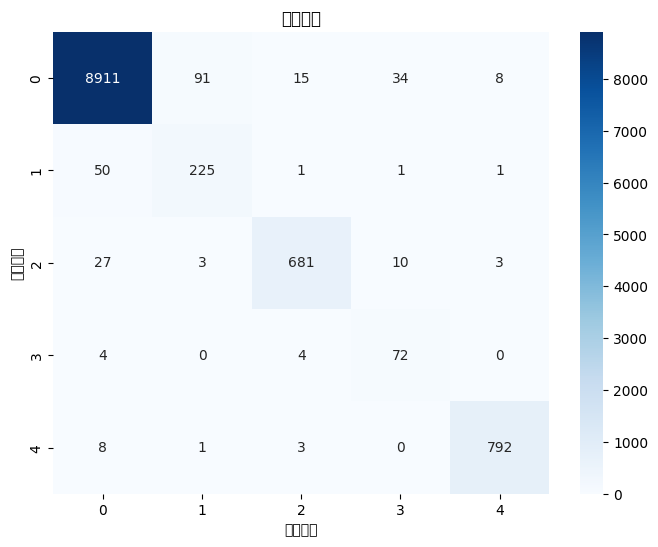

類別 0:
  精確度 (Precision): 0.9901
  召回率 (Recall): 0.9837
  特異性 (Specificity): 0.9528
  F1 分數 (F1-score): 0.9869
類別 1:
  精確度 (Precision): 0.7031
  召回率 (Recall): 0.8094
  特異性 (Specificity): 0.9911
  F1 分數 (F1-score): 0.7525
類別 2:
  精確度 (Precision): 0.9673
  召回率 (Recall): 0.9406
  特異性 (Specificity): 0.9977
  F1 分數 (F1-score): 0.9538
類別 3:
  精確度 (Precision): 0.6154
  召回率 (Recall): 0.9000
  特異性 (Specificity): 0.9959
  F1 分數 (F1-score): 0.7310
類別 4:
  精確度 (Precision): 0.9851
  召回率 (Recall): 0.9851
  特異性 (Specificity): 0.9988
  F1 分數 (F1-score): 0.9851

整體準確度 (Accuracy): 0.9759


In [ ]:
# @title
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # 導入 SMOTE 函式庫

# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test

def build_mlp_model(input_shape, num_classes):
    """建立 MLP 模型"""
    model = Sequential()
    model.add(Dense(512, input_dim=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

def augment_data(data, labels):
    """增加數據增強"""
    # 使用 SMOTE 對數據進行過採樣
    smote = SMOTE(random_state=42)
    data_resampled, labels_resampled = smote.fit_resample(data, labels)
    return np.array(data_resampled), np.array(labels_resampled)



if __name__ == '__main__':
     # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 準備訓練數據
    x_train = np.array(list(train_df['heartbeat']))
    y_train = np.array(list(train_df['encoded_symbol']))
    x_val = np.array(list(val_df['heartbeat']))
    y_val = np.array(list(val_df['encoded_symbol']))
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))


    # 數據增強
    x_train_resampled, y_train_resampled = augment_data(x_train, y_train)


    # 設定訓練參數
    epochs = 49 # 增加 epochs
    batch_size = 256
    class_weights = {0: 1, 1: 5, 2: 1, 3: 3, 4: 1} # 調整類別權重，類別1和類別3的權重較高

    # 建立模型
    model = build_mlp_model(input_shape=x_train.shape[1], num_classes=len(np.unique(y_train)))

    # 編譯模型
    optimizer = optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001) #使用AdamW
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 設定 Early Stopping
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

    # 訓練模型
    history = model.fit(x_train_resampled, y_train_resampled,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        class_weight=class_weights, # 加入類別權重
                        callbacks=[early_stopping]
                        )


    # 儲存模型
    model.save("heartbeat_mlp_model_optimized.h5")
    print("優化後的模型已儲存至 heartbeat_mlp_model_optimized.h5")

    # 載入模型
    model = tf.keras.models.load_model("heartbeat_mlp_model_optimized.h5")

    # 預測測試集
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, y_pred_classes)
    print("混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('混淆矩陣')
    plt.show()

    # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, y_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
      tp = cm[label, label]
      fn = np.sum(cm[label, :]) - tp
      fp = np.sum(cm[:, label]) - tp
      tn = np.sum(cm) - tp - fn - fp

      recall = tp / (tp + fn) if (tp + fn) > 0 else 0
      specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

      print(f"類別 {label}:")
      print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
      print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
      print(f"  特異性 (Specificity): {specificity:.4f}")
      print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

     # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"\n整體準確度 (Accuracy): {accuracy:.4f}")

## 3. RNN類型

## GRU 47295


In [ ]:
# @title
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test


def build_gru_model(input_shape=(187, 1), num_classes=5):
    """建立 GRU 模型"""
    model = models.Sequential()
    model.add(layers.GRU(128, input_shape=input_shape, return_sequences=True))
    model.add(layers.Dropout(0.2))
    model.add(layers.GRU(128, return_sequences=False))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

def augment_data(data, labels):
    """增加數據增強"""
    # 使用 SMOTE 對數據進行過採樣
    smote = SMOTE(random_state=42)
    data_resampled, labels_resampled = smote.fit_resample(data, labels)
    return np.array(data_resampled), np.array(labels_resampled)


if __name__ == '__main__':
    # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 準備訓練數據
    x_train = np.array(list(train_df['heartbeat']))
    y_train = np.array(list(train_df['encoded_symbol']))
    x_val = np.array(list(val_df['heartbeat']))
    y_val = np.array(list(val_df['encoded_symbol']))
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))

    # 調整數據形狀
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


    # 數據增強
    x_train_resampled, y_train_resampled = augment_data(x_train.reshape(x_train.shape[0], x_train.shape[1]), y_train)
    x_train_resampled = x_train_resampled.reshape(x_train_resampled.shape[0], x_train_resampled.shape[1], 1)

    # 設定訓練參數
    epochs = 100  # 增加 epochs
    batch_size = 256
    class_weights = {0: 1, 1: 2, 2: 1, 3: 1, 4: 1}  # 調整類別權重，類別1和類別3的權重較高

    # 建立模型
    model = build_gru_model(input_shape=x_train.shape[1:], num_classes=len(np.unique(y_train)))

    # 編譯模型
    optimizer = optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001)  # 使用AdamW
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 設定 Early Stopping
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # 訓練模型
    history = model.fit(x_train_resampled, y_train_resampled,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val),
                        class_weight=class_weights,  # 加入類別權重
                        callbacks=[early_stopping]
                        )

    # 儲存模型
    model.save("heartbeat_gru_model_optimized.h5")
    print("優化後的模型已儲存至 heartbeat_gru_model_optimized.h5")

    # 載入模型
    model = tf.keras.models.load_model("heartbeat_gru_model_optimized.h5")

    # 預測測試集
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, y_pred_classes)
    print("混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('混淆矩陣')
    plt.show()

    # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, y_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
      tp = cm[label, label]
      fn = np.sum(cm[label, :]) - tp
      fp = np.sum(cm[:, label]) - tp
      tn = np.sum(cm) - tp - fn - fp

      recall = tp / (tp + fn) if (tp + fn) > 0 else 0
      specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

      print(f"類別 {label}:")
      print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
      print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
      print(f"  特異性 (Specificity): {specificity:.4f}")
      print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

    # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"\n整體準確度 (Accuracy): {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 50s 34ms/step - accuracy: 0.3988 - loss: 1.5405 - val_accuracy: 0.5726 - val_loss: 0.9658
Epoch 2/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.8101 - loss: 0.5988 - val_accuracy: 0.8614 - val_loss: 0.4569
Epoch 3/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9145 - loss: 0.3021 - val_accuracy: 0.8715 - val_loss: 0.3676
Epoch 4/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 54s 38ms/step - accuracy: 0.9398 - loss: 0.2120 - val_accuracy: 0.9041 - val_loss: 0.2577
Epoch 5/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 78s 35ms/step - accuracy: 0.9553 - loss: 0.1569 - val_accuracy: 0.9291 - val_loss: 0.2112
Epoch 6/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 0.9643 - loss: 0.1248 - val_accuracy: 0.9510 - val_loss: 0.1617
Epoch 7/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 79s 35ms/step - accuracy: 0.9704 - loss: 0.1040 - val_accuracy: 0.9433 - val_loss: 0.1842
Epoch 8/100
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step - accuracy: 

## 4. 樹類型

## XGB 45653

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:40:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 模型已儲存至 heartbeat_xgboost_model.pkl
混淆矩陣:
 [[8311  464   91  145   48]
 [  43  233    1    1    0]
 [  32    5  674   12    1]
 [   4    0    4   72    0]
 [   7    0    9    1  787]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas

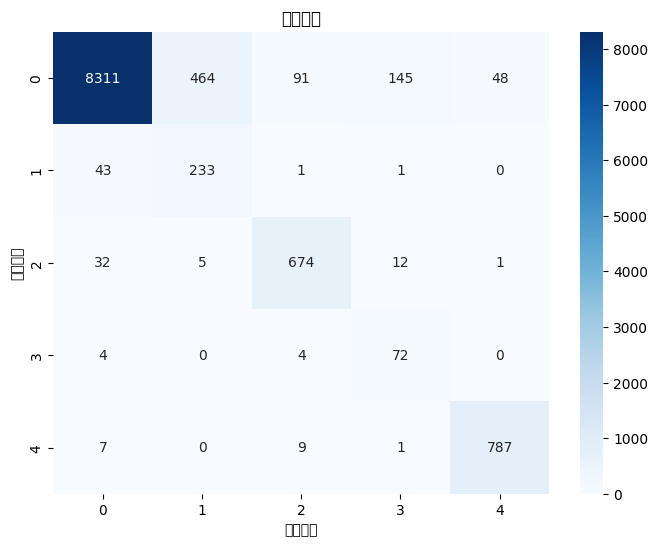

類別 0:
  精確度 (Precision): 0.9898
  召回率 (Recall): 0.9174
  特異性 (Specificity): 0.9544
  F1 分數 (F1-score): 0.9522
類別 1:
  精確度 (Precision): 0.3319
  召回率 (Recall): 0.8381
  特異性 (Specificity): 0.9560
  F1 分數 (F1-score): 0.4755
類別 2:
  精確度 (Precision): 0.8652
  召回率 (Recall): 0.9309
  特異性 (Specificity): 0.9897
  F1 分數 (F1-score): 0.8969
類別 3:
  精確度 (Precision): 0.3117
  召回率 (Recall): 0.9000
  特異性 (Specificity): 0.9854
  F1 分數 (F1-score): 0.4630
類別 4:
  精確度 (Precision): 0.9414
  召回率 (Recall): 0.9789
  特異性 (Specificity): 0.9952
  F1 分數 (F1-score): 0.9598

整體準確度 (Accuracy): 0.9207


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pickle  # 導入 pickle 模組用於儲存模型


# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test


def augment_data(data, labels):
    """增加數據增強"""
    # 使用 SMOTE 對數據進行過採樣
    smote = SMOTE(random_state=42)
    data_resampled, labels_resampled = smote.fit_resample(data, labels)
    return np.array(data_resampled), np.array(labels_resampled)


if __name__ == '__main__':
    # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 準備訓練數據
    x_train = np.array(list(train_df['heartbeat']))
    y_train = np.array(list(train_df['encoded_symbol']))
    x_val = np.array(list(val_df['heartbeat']))
    y_val = np.array(list(val_df['encoded_symbol']))
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))

    # 數據增強
    x_train_resampled, y_train_resampled = augment_data(x_train, y_train)

    # 設定訓練參數
    params = {
        'objective': 'multi:softmax',
        'num_class': len(np.unique(y_train)),
        'eval_metric': 'merror',
        'eta': 0.1,
        'max_depth': 6,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'seed': 42,
         'tree_method': 'hist'  # 使用hist以提高效率
    }
    class_weights = {0: 1, 1: 2, 2: 1, 3: 1, 4: 1}  # 調整類別權重，類別1和類別3的權重較高

    # 建立 XGBoost 模型
    model = xgb.XGBClassifier(**params, use_label_encoder=False) #避免版本問題, 使用use_label_encoder=False

    # 訓練模型
    model.fit(x_train_resampled, y_train_resampled, sample_weight=np.array([class_weights[label] for label in y_train_resampled]))

    # 儲存模型
    with open("heartbeat_xgboost_model.pkl", "wb") as f:
      pickle.dump(model, f)
    print("XGBoost 模型已儲存至 heartbeat_xgboost_model.pkl")

    # 載入模型
    with open("heartbeat_xgboost_model.pkl", "rb") as f:
      model = pickle.load(f)

    # 預測測試集
    y_pred_classes = model.predict(x_test)

    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, y_pred_classes)
    print("混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('混淆矩陣')
    plt.show()

    # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, y_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
        tp = cm[label, label]
        fn = np.sum(cm[label, :]) - tp
        fp = np.sum(cm[:, label]) - tp
        tn = np.sum(cm) - tp - fn - fp

        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        print(f"類別 {label}:")
        print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
        print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
        print(f"  特異性 (Specificity): {specificity:.4f}")
        print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

    # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"\n整體準確度 (Accuracy): {accuracy:.4f}")

## LGBM 46052

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LightGBM 模型已儲存至 heartbeat_lightgbm_model.pkl


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


混淆矩陣:
 [[8727  221   50   43   18]
 [  46  230    2    0    0]
 [  28    4  681    9    2]
 [   5    0    3   72    0]
 [  13    2    6    0  783]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from font(s) DejaVu Sans.
  fig.canvas

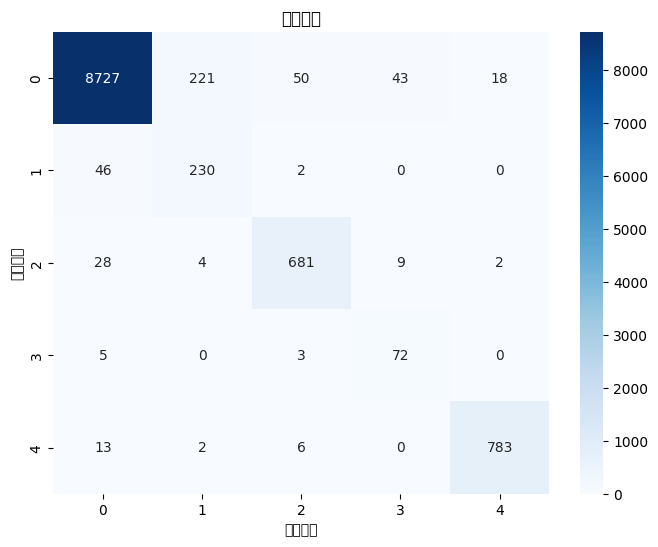

類別 0:
  精確度 (Precision): 0.9896
  召回率 (Recall): 0.9634
  特異性 (Specificity): 0.9512
  F1 分數 (F1-score): 0.9763
類別 1:
  精確度 (Precision): 0.5033
  召回率 (Recall): 0.8273
  特異性 (Specificity): 0.9787
  F1 分數 (F1-score): 0.6259
類別 2:
  精確度 (Precision): 0.9178
  召回率 (Recall): 0.9406
  特異性 (Specificity): 0.9940
  F1 分數 (F1-score): 0.9291
類別 3:
  精確度 (Precision): 0.5806
  召回率 (Recall): 0.9000
  特異性 (Specificity): 0.9952
  F1 分數 (F1-score): 0.7059
類別 4:
  精確度 (Precision): 0.9751
  召回率 (Recall): 0.9739
  特異性 (Specificity): 0.9980
  F1 分數 (F1-score): 0.9745

整體準確度 (Accuracy): 0.9587


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import pickle  # 導入 pickle 模組用於儲存模型


# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test


def augment_data(data, labels):
    """增加數據增強"""
    # 使用 SMOTE 對數據進行過採樣
    smote = SMOTE(random_state=42)
    data_resampled, labels_resampled = smote.fit_resample(data, labels)
    return np.array(data_resampled), np.array(labels_resampled)


if __name__ == '__main__':
    # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 準備訓練數據
    x_train = np.array(list(train_df['heartbeat']))
    y_train = np.array(list(train_df['encoded_symbol']))
    x_val = np.array(list(val_df['heartbeat']))
    y_val = np.array(list(val_df['encoded_symbol']))
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))

    # 數據增強
    x_train_resampled, y_train_resampled = augment_data(x_train, y_train)

    # 設定訓練參數
    params = {
        'objective': 'multiclass',
        'num_class': len(np.unique(y_train)),
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'learning_rate': 0.1,
        'num_leaves': 31,
        'max_depth': -1,
        'feature_fraction': 0.8,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
        'verbose': -1,
        'seed': 42
    }

    class_weights = {0: 1, 1: 2, 2: 1, 3: 1, 4: 1}  # 調整類別權重，類別1和類別3的權重較高

    # 建立 LightGBM 模型
    model = lgb.LGBMClassifier(**params, class_weight=class_weights)

    # 訓練模型
    model.fit(x_train_resampled, y_train_resampled)

    # 儲存模型
    with open("heartbeat_lightgbm_model.pkl", "wb") as f:
      pickle.dump(model, f)
    print("LightGBM 模型已儲存至 heartbeat_lightgbm_model.pkl")

    # 載入模型
    with open("heartbeat_lightgbm_model.pkl", "rb") as f:
      model = pickle.load(f)


    # 預測測試集
    y_pred_classes = model.predict(x_test)

    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, y_pred_classes)
    print("混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('混淆矩陣')
    plt.show()

    # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, y_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
        tp = cm[label, label]
        fn = np.sum(cm[label, :]) - tp
        fp = np.sum(cm[:, label]) - tp
        tn = np.sum(cm) - tp - fn - fp

        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        print(f"類別 {label}:")
        print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
        print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
        print(f"  特異性 (Specificity): {specificity:.4f}")
        print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

    # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"\n整體準確度 (Accuracy): {accuracy:.4f}")

## 步驟3:最後讓我們試模型集成

## CNN(resnet)+GRU+XGB+LGBM 47633/49627

## 95.26/99.925

343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
集成模型的混淆矩陣:
 [[8997   33   13   12    4]
 [  32  245    1    0    0]
 [  16    3  696    8    1]
 [   1    0    4   75    0]
 [   7    0    1    0  796]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  fig.canvas

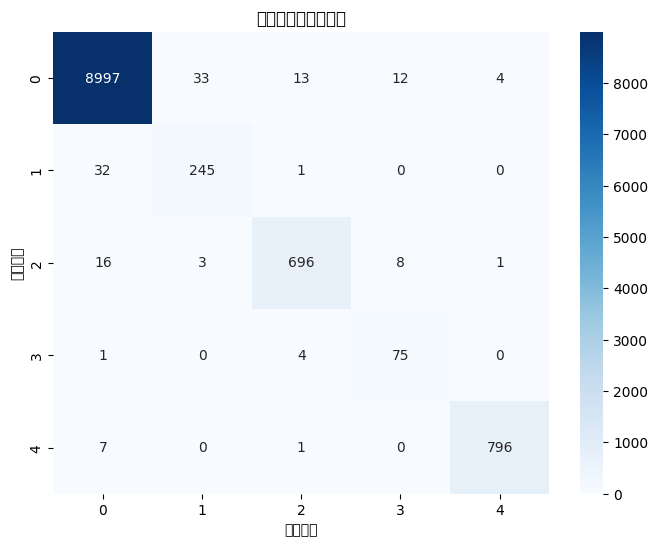

類別 0:
  精確度 (Precision): 0.9938
  召回率 (Recall): 0.9932
  特異性 (Specificity): 0.9703
  F1 分數 (F1-score): 0.9935
類別 1:
  精確度 (Precision): 0.8719
  召回率 (Recall): 0.8813
  特異性 (Specificity): 0.9966
  F1 分數 (F1-score): 0.8766
類別 2:
  精確度 (Precision): 0.9734
  召回率 (Recall): 0.9613
  特異性 (Specificity): 0.9981
  F1 分數 (F1-score): 0.9673
類別 3:
  精確度 (Precision): 0.7895
  召回率 (Recall): 0.9375
  特異性 (Specificity): 0.9982
  F1 分數 (F1-score): 0.8571
類別 4:
  精確度 (Precision): 0.9938
  召回率 (Recall): 0.9900
  特異性 (Specificity): 0.9995
  F1 分數 (F1-score): 0.9919

集成模型的整體準確度 (Accuracy): 0.9876


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # 導入 pickle 模組用於載入模型


# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test

def ensemble_predictions(cnn_model, xgb_model, lgbm_model, gru_model, x_test, cnn_weight=0.3, xgb_weight=0.15, lgbm_weight=0.15, gru_weight=0.4):
    """集成 CNN, XGBoost, LightGBM 和 GRU 模型的預測結果"""
    cnn_predictions = cnn_model.predict(x_test)
     # Reshape x_test to 2D for XGBoost and LightGBM
    x_test_2d = x_test.reshape(x_test.shape[0], -1)
    xgb_predictions = xgb_model.predict_proba(x_test_2d)
    lgbm_predictions = lgbm_model.predict_proba(x_test_2d)
    gru_predictions = gru_model.predict(x_test)

    # 加權平均預測結果
    ensemble_predictions = (cnn_weight * cnn_predictions) + (xgb_weight * xgb_predictions) + (lgbm_weight * lgbm_predictions) + (gru_weight * gru_predictions)
    return ensemble_predictions

if __name__ == '__main__':
    # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

     # 準備測試數據
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))

    # 調整數據形狀
    x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


    # 載入模型
    cnn_model = tf.keras.models.load_model("/content/heartbeat_cnn_model_optimized_adv.h5")

    with open("heartbeat_xgboost_model.pkl", "rb") as f:
        xgb_model = pickle.load(f)
    with open("heartbeat_lightgbm_model.pkl", "rb") as f:
         lgbm_model = pickle.load(f)

    gru_model = tf.keras.models.load_model("heartbeat_gru_model_optimized.h5")


    # 集成預測
    ensemble_pred = ensemble_predictions(cnn_model, xgb_model, lgbm_model, gru_model, x_test_cnn, cnn_weight=0.3, xgb_weight=0.15, lgbm_weight=0.15, gru_weight=0.4)
    ensemble_pred_classes = np.argmax(ensemble_pred, axis=1)


    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, ensemble_pred_classes)
    print("集成模型的混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('集成模型的混淆矩陣')
    plt.show()

     # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, ensemble_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
        tp = cm[label, label]
        fn = np.sum(cm[label, :]) - tp
        fp = np.sum(cm[:, label]) - tp
        tn = np.sum(cm) - tp - fn - fp

        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        print(f"類別 {label}:")
        print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
        print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
        print(f"  特異性 (Specificity): {specificity:.4f}")
        print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

     # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, ensemble_pred_classes)
    print(f"\n集成模型的整體準確度 (Accuracy): {accuracy:.4f}")

## CNN+XGB+LGBM 47321/49538

343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


集成模型的混淆矩陣:
 [[8952   54   20   24    9]
 [  38  239    1    0    0]
 [  19    2  692   10    1]
 [   4    0    3   73    0]
 [   4    1    0    0  799]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  fig.canvas

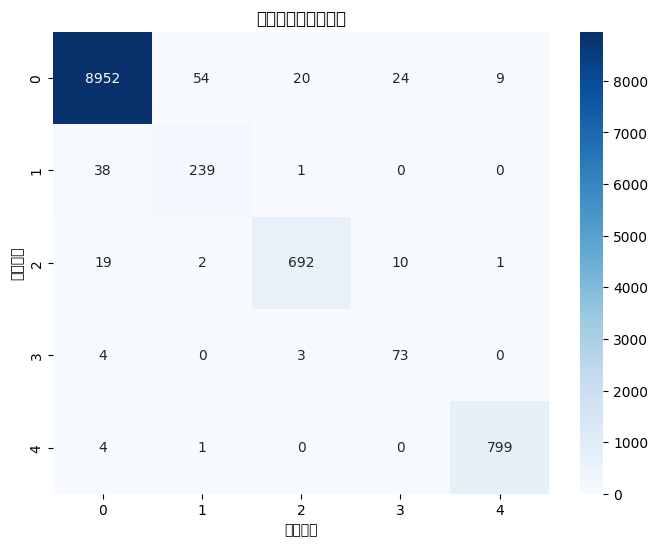

類別 0:
  精確度 (Precision): 0.9928
  召回率 (Recall): 0.9882
  特異性 (Specificity): 0.9655
  F1 分數 (F1-score): 0.9905
類別 1:
  精確度 (Precision): 0.8074
  召回率 (Recall): 0.8597
  特異性 (Specificity): 0.9947
  F1 分數 (F1-score): 0.8328
類別 2:
  精確度 (Precision): 0.9665
  召回率 (Recall): 0.9558
  特異性 (Specificity): 0.9977
  F1 分數 (F1-score): 0.9611
類別 3:
  精確度 (Precision): 0.6822
  召回率 (Recall): 0.9125
  特異性 (Specificity): 0.9969
  F1 分數 (F1-score): 0.7807
類別 4:
  精確度 (Precision): 0.9876
  召回率 (Recall): 0.9938
  特異性 (Specificity): 0.9990
  F1 分數 (F1-score): 0.9907

集成模型的整體準確度 (Accuracy): 0.9826


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # 導入 pickle 模組用於載入模型


# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test

def ensemble_predictions(cnn_model, xgb_model, lgbm_model, x_test, cnn_weight=0.4, xgb_weight=0.3, lgbm_weight=0.3):
    """集成 CNN, XGBoost 和 LightGBM 模型的預測結果"""
    cnn_predictions = cnn_model.predict(x_test)
    # Reshape x_test to 2D for XGBoost and LightGBM
    x_test_2d = x_test.reshape(x_test.shape[0], -1)  # Reshape to (num_samples, num_features)
    xgb_predictions = xgb_model.predict_proba(x_test_2d)
    lgbm_predictions = lgbm_model.predict_proba(x_test_2d)

    # 加權平均預測結果
    ensemble_predictions = (cnn_weight * cnn_predictions) + (xgb_weight * xgb_predictions) + (lgbm_weight * lgbm_predictions)
    return ensemble_predictions

if __name__ == '__main__':
    # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

     # 準備測試數據
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))

    # 調整數據形狀
    x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


    # 載入模型
    cnn_model = tf.keras.models.load_model("heartbeat_cnn_model_optimized.h5")

    with open("heartbeat_xgboost_model.pkl", "rb") as f:
        xgb_model = pickle.load(f)
    with open("heartbeat_lightgbm_model.pkl", "rb") as f:
         lgbm_model = pickle.load(f)

     # 集成預測
    ensemble_pred = ensemble_predictions(cnn_model, xgb_model, lgbm_model, x_test_cnn, cnn_weight=0.4, xgb_weight=0.3, lgbm_weight=0.3)
    ensemble_pred_classes = np.argmax(ensemble_pred, axis=1)


    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, ensemble_pred_classes)
    print("集成模型的混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('集成模型的混淆矩陣')
    plt.show()

     # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, ensemble_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
        tp = cm[label, label]
        fn = np.sum(cm[label, :]) - tp
        fp = np.sum(cm[:, label]) - tp
        tn = np.sum(cm) - tp - fn - fp

        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        print(f"類別 {label}:")
        print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
        print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
        print(f"  特異性 (Specificity): {specificity:.4f}")
        print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

     # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, ensemble_pred_classes)
    print(f"\n集成模型的整體準確度 (Accuracy): {accuracy:.4f}")

## CNN+MLP

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
集成模型的混淆矩陣:
 [[8959   53   12   27    8]
 [  34  240    3    0    1]
 [  21    1  688   12    2]
 [   4    0    4   72    0]
 [   7    0    1    0  796]]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  fig.canvas

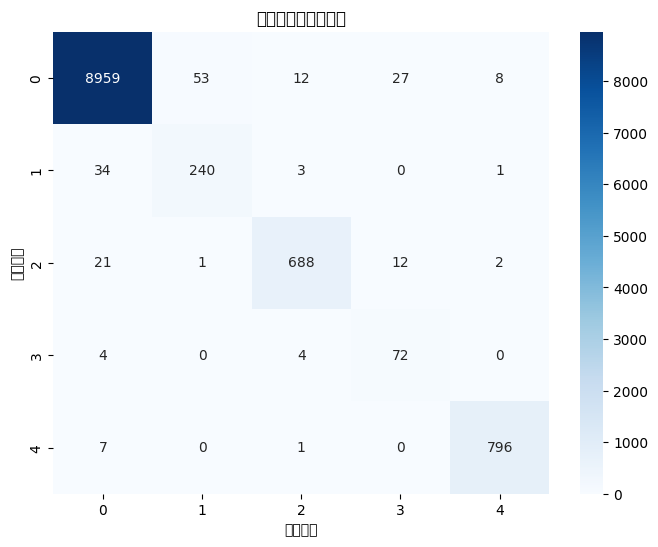

類別 0:
  精確度 (Precision): 0.9927
  召回率 (Recall): 0.9890
  特異性 (Specificity): 0.9650
  F1 分數 (F1-score): 0.9908
類別 1:
  精確度 (Precision): 0.8163
  召回率 (Recall): 0.8633
  特異性 (Specificity): 0.9949
  F1 分數 (F1-score): 0.8392
類別 2:
  精確度 (Precision): 0.9718
  召回率 (Recall): 0.9503
  特異性 (Specificity): 0.9980
  F1 分數 (F1-score): 0.9609
類別 3:
  精確度 (Precision): 0.6486
  召回率 (Recall): 0.9000
  特異性 (Specificity): 0.9964
  F1 分數 (F1-score): 0.7539
類別 4:
  精確度 (Precision): 0.9864
  召回率 (Recall): 0.9900
  特異性 (Specificity): 0.9989
  F1 分數 (F1-score): 0.9882

集成模型的整體準確度 (Accuracy): 0.9826


In [ ]:
# @title
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # 導入 SMOTE 函式庫

# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test

def build_cnn_model(input_shape=(187, 1), num_classes=5):
    """建立 CNN 模型"""
    model = models.Sequential()

    # Coupled Convolutional Layers
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the first convolution block

    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the second convolution block

    model.add(layers.Flatten())  # Flatten layer to prepare for the fully connected layers

    # Fully Connected Layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer before the first fully connected layer

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer before the second fully connected layer

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


def build_mlp_model(input_shape, num_classes):
    """建立 MLP 模型"""
    model = Sequential()
    model.add(Dense(512, input_dim=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model


def augment_data(data, labels):
    """增加數據增強"""
    # 使用 SMOTE 對數據進行過採樣
    smote = SMOTE(random_state=42)
    data_resampled, labels_resampled = smote.fit_resample(data, labels)
    return np.array(data_resampled), np.array(labels_resampled)


def ensemble_predictions(cnn_model, mlp_model, x_test, cnn_weight=0.5, mlp_weight=0.5):
    """集成 CNN 和 MLP 模型的預測結果"""
    cnn_predictions = cnn_model.predict(x_test)
    mlp_predictions = mlp_model.predict(x_test)

    # 加權平均預測結果
    ensemble_predictions = (cnn_weight * cnn_predictions) + (mlp_weight * mlp_predictions)
    return ensemble_predictions


if __name__ == '__main__':
    # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 準備訓練數據
    x_train = np.array(list(train_df['heartbeat']))
    y_train = np.array(list(train_df['encoded_symbol']))
    x_val = np.array(list(val_df['heartbeat']))
    y_val = np.array(list(val_df['encoded_symbol']))
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))

    # 調整數據形狀
    x_train_cnn = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_val_cnn = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
    x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


    # 數據增強
    x_train_cnn_resampled, y_train_resampled = augment_data(x_train_cnn.reshape(x_train_cnn.shape[0], x_train_cnn.shape[1]), y_train)
    x_train_cnn_resampled = x_train_cnn_resampled.reshape(x_train_cnn_resampled.shape[0], x_train_cnn_resampled.shape[1], 1)
    x_train_mlp_resampled, y_train_mlp_resampled = augment_data(x_train, y_train)

    # 設定訓練參數
    epochs = 100  # 增加 epochs
    batch_size = 256
    class_weights = {0: 1, 1: 5, 2: 1, 3: 3, 4: 1}  # 調整類別權重，類別1和類別3的權重較高

    # 建立 CNN 模型
    cnn_model = build_cnn_model(input_shape=x_train_cnn.shape[1:], num_classes=len(np.unique(y_train)))

    # 編譯 CNN 模型
    optimizer_cnn = optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001)  # 使用AdamW
    cnn_model.compile(optimizer=optimizer_cnn, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 設定 CNN 模型 Early Stopping
    early_stopping_cnn = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # 訓練 CNN 模型
    #cnn_history = cnn_model.fit(x_train_cnn_resampled, y_train_resampled,
    #                    epochs=epochs,
    #                    batch_size=batch_size,
    #                   validation_data=(x_val_cnn, y_val),
    #                    class_weight=class_weights, # 加入類別權重
    #                    callbacks=[early_stopping_cnn]
    #                    )

    # 儲存 CNN 模型
    #cnn_model.save("heartbeat_cnn_model_optimized.h5")
    #print("優化後的 CNN 模型已儲存至 heartbeat_cnn_model_optimized.h5")


    # 建立 MLP 模型
    mlp_model = build_mlp_model(input_shape=x_train.shape[1], num_classes=len(np.unique(y_train)))

    # 編譯 MLP 模型
    optimizer_mlp = optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001)  # 使用AdamW
    mlp_model.compile(optimizer=optimizer_mlp, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 設定 MLP 模型 Early Stopping
    early_stopping_mlp = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # 訓練 MLP 模型
    #mlp_history = mlp_model.fit(x_train_mlp_resampled, y_train_mlp_resampled,
    #                    epochs=epochs,
    #                    batch_size=batch_size,
    #                    validation_data=(x_val, y_val),
    #                    class_weight=class_weights, # 加入類別權重
    #                    callbacks=[early_stopping_mlp]
    #                    )

    # 儲存 MLP 模型
    #mlp_model.save("heartbeat_mlp_model_optimized.h5")
    #print("優化後的 MLP 模型已儲存至 heartbeat_mlp_model_optimized.h5")


    # 載入模型
    cnn_model = tf.keras.models.load_model("heartbeat_cnn_model_optimized.h5")
    mlp_model = tf.keras.models.load_model("heartbeat_mlp_model_optimized.h5")

    # 集成預測
    ensemble_pred = ensemble_predictions(cnn_model, mlp_model, x_test_cnn, cnn_weight=0.6, mlp_weight=0.4)
    ensemble_pred_classes = np.argmax(ensemble_pred, axis=1)


    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, ensemble_pred_classes)
    print("集成模型的混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('集成模型的混淆矩陣')
    plt.show()

    # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, ensemble_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
      tp = cm[label, label]
      fn = np.sum(cm[label, :]) - tp
      fp = np.sum(cm[:, label]) - tp
      tn = np.sum(cm) - tp - fn - fp

      recall = tp / (tp + fn) if (tp + fn) > 0 else 0
      specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

      print(f"類別 {label}:")
      print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
      print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
      print(f"  特異性 (Specificity): {specificity:.4f}")
      print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

     # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, ensemble_pred_classes)
    print(f"\n集成模型的整體準確度 (Accuracy): {accuracy:.4f}")

## 補充資料

## transformer

In [ ]:
# @title
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test


def positional_encoding(length, depth):
    """創建位置編碼"""
    depth = depth / 2

    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate([np.sin(angle_rads), np.cos(angle_rads)], axis=-1)

    return tf.cast(pos_encoding, dtype=tf.float32)


class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


def build_transformer_model(input_shape=(187, 1), num_classes=5, embed_dim=64, num_heads=4, ff_dim=32):
    """建立 Transformer 模型"""
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv1D(embed_dim, 5, padding='same', activation='relu')(inputs)

    # Add positional encoding
    pos_encoding = positional_encoding(input_shape[0], embed_dim)
    x = x + pos_encoding

    # Transformer Layers
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
    x = transformer_block(x, training=True) # Pass training=True during training

    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
    x = transformer_block(x, training=True) # Pass training=True during training

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.5)(x)  # Optional dropout for regularization

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    return models.Model(inputs=inputs, outputs=outputs)

def augment_data(data, labels):
    """增加數據增強"""
    # 使用 SMOTE 對數據進行過採樣
    smote = SMOTE(random_state=42)
    data_resampled, labels_resampled = smote.fit_resample(data, labels)
    return np.array(data_resampled), np.array(labels_resampled)


if __name__ == '__main__':
     # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 準備訓練數據
    x_train = np.array(list(train_df['heartbeat']))
    y_train = np.array(list(train_df['encoded_symbol']))
    x_val = np.array(list(val_df['heartbeat']))
    y_val = np.array(list(val_df['encoded_symbol']))
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))

    # 調整數據形狀
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    # 數據增強
    x_train_resampled, y_train_resampled = augment_data(x_train.reshape(x_train.shape[0], x_train.shape[1]), y_train)
    x_train_resampled = x_train_resampled.reshape(x_train_resampled.shape[0], x_train_resampled.shape[1], 1)

    # 設定訓練參數
    epochs = 100  # 增加 epochs
    batch_size = 256
    class_weights = {0: 1, 1: 5, 2: 1, 3: 3, 4: 1}  # 調整類別權重，類別1和類別3的權重較高

    # 建立模型
    model = build_transformer_model(input_shape=x_train.shape[1:], num_classes=len(np.unique(y_train)))

    # 編譯模型
    optimizer = optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 設定 Early Stopping
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # 訓練模型
    #history = model.fit(x_train_resampled, y_train_resampled,
    #                    epochs=epochs,
    #                    batch_size=batch_size,
    #                    validation_data=(x_val, y_val),
    #                    class_weight=class_weights,  # 加入類別權重
    #                    callbacks=[early_stopping]
    #                    )

    # 儲存模型
    #model.save("heartbeat_transformer_model_optimized.h5")
    #print("優化後的 Transformer 模型已儲存至 heartbeat_transformer_model_optimized.h5")

    # 載入模型
    model = tf.keras.models.load_model("heartbeat_transformer_model_optimized.h5")

    # 預測測試集
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, y_pred_classes)
    print("混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('混淆矩陣')
    plt.show()

    # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, y_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
      tp = cm[label, label]
      fn = np.sum(cm[label, :]) - tp
      fp = np.sum(cm[:, label]) - tp
      tn = np.sum(cm) - tp - fn - fp

      recall = tp / (tp + fn) if (tp + fn) > 0 else 0
      specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

      print(f"類別 {label}:")
      print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
      print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
      print(f"  特異性 (Specificity): {specificity:.4f}")
      print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

     # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"\n整體準確度 (Accuracy): {accuracy:.4f}")

ValueError: Unknown layer: 'TransformerBlock'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

## 以下是論文CNN作法

## Step 2: 資料預處理（如適用）

In [ ]:
# @title
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑

def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df

def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

     # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df

def split_data(processed_df):
  """分割數據為訓練集、驗證集和測試集"""
  train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,stratify = processed_df["encoded_symbol"])
  train, val = train_test_split(train_val, test_size=0.1111, random_state=42,stratify=train_val["encoded_symbol"]) #0.1111 = 1/9
  return train, val, test

if __name__ == "__main__":
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 顯示處理後的資料集大小
    print("處理後的訓練集大小:", len(train_df))
    print("處理後的驗證集大小:", len(val_df))
    print("處理後的測試集大小:", len(test_df))

    # 顯示前幾筆處理後的數據
    print("前 5 筆處理後的訓練數據:")
    print(train_df.head())

處理後的訓練集大小: 87557
處理後的驗證集大小: 10944
處理後的測試集大小: 10945
前 5 筆處理後的訓練數據:
                                               heartbeat  encoded_symbol
73934  [0.89451474, 0.84810126, 0.23206751, 0.0126582...               1
65453  [1.0, 0.71659917, 0.13360325, 0.04453441, 0.11...               0
81871  [1.0, 0.56, 0.58666664, 0.6622222, 0.6488889, ...               4
52368  [0.9919355, 0.76344085, 0.15053764, 0.0, 0.083...               0
60397  [1.0, 0.85117966, 0.35390198, 0.12885663, 0.17...               0


## Step 3: 建立5分類模型(SOFTMAX)

In [ ]:
# @title
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

def build_cnn_model(input_shape=(300, 1), num_classes=5):
    """建立 CNN 模型"""
    model = models.Sequential()

    # Coupled Convolutional Layers
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the first convolution block

    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the second convolution block

    model.add(layers.Flatten()) # Flatten layer to prepare for the fully connected layers

    # Fully Connected Layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5)) # Dropout layer before the first fully connected layer

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5)) # Dropout layer before the second fully connected layer

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

if __name__ == '__main__':
    # 建立模型
    model = build_cnn_model()

    # 顯示模型結構
    model.summary()

    #編譯模型
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 300, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 300, 64)             │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 150, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 150, 128)            │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 150, 128)            │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,457,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,586,309 (9.87 MB)

 Trainable params: 2,586,309 (9.87 MB)

 Non-trainable params: 0 (0.00 B)

## Step 4: 訓練與儲存

In [ ]:
# @title
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test


def build_cnn_model(input_shape=(187, 1), num_classes=5):
    """建立 CNN 模型"""
    model = models.Sequential()

    # Coupled Convolutional Layers
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the first convolution block

    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the second convolution block

    model.add(layers.Flatten())  # Flatten layer to prepare for the fully connected layers

    # Fully Connected Layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer before the first fully connected layer

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer before the second fully connected layer

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


if __name__ == '__main__':
    # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 準備訓練數據
    x_train = np.array(list(train_df['heartbeat']))
    y_train = np.array(list(train_df['encoded_symbol']))
    x_val = np.array(list(val_df['heartbeat']))
    y_val = np.array(list(val_df['encoded_symbol']))
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))

     # 確認形狀
    print("x_train shape:", x_train.shape)
    print("y_train shape:", y_train.shape)
    print("x_val shape:", x_val.shape)
    print("y_val shape:", y_val.shape)
    print("x_test shape:", x_test.shape)
    print("y_test shape:", y_test.shape)

    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    # 設定訓練參數
    epochs = 20  # 您可以根據需要調整 epochs 數量
    batch_size = 256  # 您可以根據需要調整 batch_size

    # 建立模型
    model = build_cnn_model(input_shape=x_train.shape[1:], num_classes=len(np.unique(y_train)))

    # 編譯模型
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # 顯示模型結構
    model.summary()

    # 訓練模型
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # 儲存模型
    model.save("heartbeat_cnn_model.h5")
    print("模型已儲存至 heartbeat_cnn_model.h5")

x_train shape: (87557, 187)
y_train shape: (87557,)
x_val shape: (10944, 187)
y_val shape: (10944,)
x_test shape: (10945, 187)
y_test shape: (10945,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 187, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 187, 64)             │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 93, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 93, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 93, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 93, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 46, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 46, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5888)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,507,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,636,037 (6.24 MB)

 Trainable params: 1,636,037 (6.24 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
343/343 ━━━━━━━━━━━━━━━━━━━━ 25s 35ms/step - accuracy: 0.8733 - loss: 0.4881 - val_accuracy: 0.9617 - val_loss: 0.1379
Epoch 2/40
343/343 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9594 - loss: 0.1510 - val_accuracy: 0.9704 - val_loss: 0.0983
Epoch 3/40
343/343 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9692 - loss: 0.1145 - val_accuracy: 0.9793 - val_loss: 0.0738
Epoch 4/40
343/343 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9741 - loss: 0.0926 - val_accuracy: 0.9814 - val_loss: 0.0650
Epoch 5/40
343/343 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9777 - loss: 0.0793 - val_accuracy: 0.9810 - val_loss: 0.0630
Epoch 6/40
343/343 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9781 - loss: 0.0774 - val_accuracy: 0.9835 - val_loss: 0.0577
Epoch 7/40
343/343 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9818 - loss: 0.0636 - val_accuracy: 0.9850 - val_loss: 0.0535
Epoch 8/40
343/343 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9835 - loss: 0.0575 - val_ac

模型已儲存至 heartbeat_cnn_model.h5


## Step 5: 輸出混淆矩陣

343/343 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
混淆矩陣:
 [[9030   13    9    6    1]
 [  49  225    3    0    1]
 [  22    1  687   11    3]
 [   6    0    3   71    0]
 [  10    0    2    0  792]]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

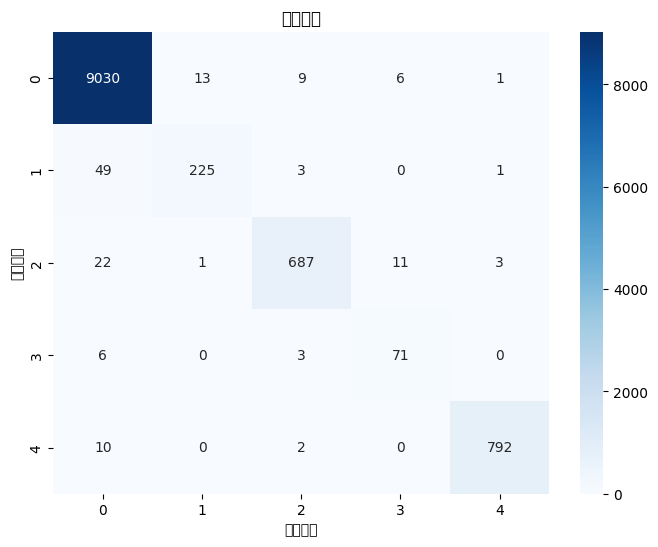

類別 0: 召回率 = 0.9968, 特異性 = 0.9539
類別 1: 召回率 = 0.8094, 特異性 = 0.9987
類別 2: 召回率 = 0.9489, 特異性 = 0.9983
類別 3: 召回率 = 0.8875, 特異性 = 0.9984
類別 4: 召回率 = 0.9851, 特異性 = 0.9995

平均召回率: 0.9255
平均特異性: 0.9898


In [ ]:
# @title
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test


def build_cnn_model(input_shape=(187, 1), num_classes=5):
    """建立 CNN 模型"""
    model = models.Sequential()

    # Coupled Convolutional Layers
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the first convolution block

    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the second convolution block

    model.add(layers.Flatten())  # Flatten layer to prepare for the fully connected layers

    # Fully Connected Layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer before the first fully connected layer

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer before the second fully connected layer

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


if __name__ == '__main__':
    # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 準備測試數據
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    # 載入模型
    model = tf.keras.models.load_model("heartbeat_cnn_model.h5")

    # 預測測試集
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)


    # 計算混淆矩陣
    cm = confusion_matrix(y_test, y_pred_classes)
    print("混淆矩陣:\n", cm)

    # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('混淆矩陣')
    plt.show()

    # 計算召回率和特異性
    report = classification_report(y_test, y_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    # 計算每個類別的召回率和特異性，不包括總計行和平均值行
    recalls = []
    specificities = []
    for label in np.unique(y_test):
        tp = cm[label, label]
        fn = np.sum(cm[label, :]) - tp
        fp = np.sum(cm[:, label]) - tp
        tn = np.sum(cm) - tp - fn - fp

        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        recalls.append(recall)
        specificities.append(specificity)

        print(f"類別 {label}: 召回率 = {recall:.4f}, 特異性 = {specificity:.4f}")

    # 計算平均召回率和特異性
    average_recall = np.mean(recalls)
    average_specificity = np.mean(specificities)

    print(f"\n平均召回率: {average_recall:.4f}")
    print(f"平均特異性: {average_specificity:.4f}")

## Step 6: 輸出每個類別的召回率、特異性、精確度和 F1 分數以及整體準確度。


343/343 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
混淆矩陣:
 [[9030   13    9    6    1]
 [  49  225    3    0    1]
 [  22    1  687   11    3]
 [   6    0    3   71    0]
 [  10    0    2    0  792]]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27161 (\N{CJK UNIFIED IDEOGRAPH-6A19}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31844 (\N{CJK UNIFIED IDEOGRAPH-7C64}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

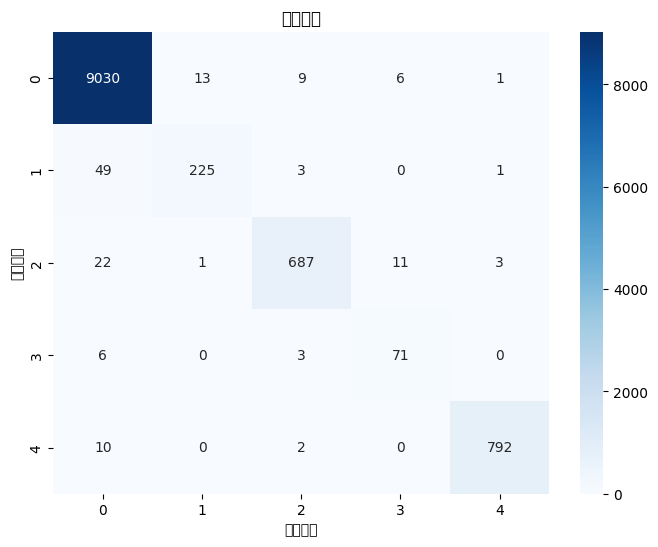

類別 0:
  精確度 (Precision): 0.9905
  召回率 (Recall): 0.9968
  特異性 (Specificity): 0.9539
  F1 分數 (F1-score): 0.9936
類別 1:
  精確度 (Precision): 0.9414
  召回率 (Recall): 0.8094
  特異性 (Specificity): 0.9987
  F1 分數 (F1-score): 0.8704
類別 2:
  精確度 (Precision): 0.9759
  召回率 (Recall): 0.9489
  特異性 (Specificity): 0.9983
  F1 分數 (F1-score): 0.9622
類別 3:
  精確度 (Precision): 0.8068
  召回率 (Recall): 0.8875
  特異性 (Specificity): 0.9984
  F1 分數 (F1-score): 0.8452
類別 4:
  精確度 (Precision): 0.9937
  召回率 (Recall): 0.9851
  特異性 (Specificity): 0.9995
  F1 分數 (F1-score): 0.9894

整體準確度 (Accuracy): 0.9872


In [ ]:
# @title
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# 設定資料集路徑
DATASET_PATH = "/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/"  # 替換為您的 Kaggle 資料集路徑


def load_data_from_csv(path, filename):
    """從 CSV 檔案讀取數據"""
    df = pd.read_csv(os.path.join(path, filename), header=None)
    return df


def preprocess_data(dataset_path):
    """從 CSV 檔案預處理數據"""
    # 載入訓練和測試數據
    train_df = load_data_from_csv(dataset_path, "mitbih_train.csv")
    test_df = load_data_from_csv(dataset_path, "mitbih_test.csv")

    # 合併訓練和測試數據，方便統一處理
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    # 提取標籤
    labels = combined_df.iloc[:, -1].values
    data = combined_df.iloc[:, :-1].values

    # 將數據轉換為 numpy 陣列
    data = np.asarray(data).astype(np.float32)

    # 編碼標籤
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(labels)

    processed_df = pd.DataFrame({
        'heartbeat': list(data),
        'encoded_symbol': encoded_labels
    })

    return processed_df


def split_data(processed_df):
    """分割數據為訓練集、驗證集和測試集"""
    train_val, test = train_test_split(processed_df, test_size=0.1, random_state=42,
                                      stratify=processed_df["encoded_symbol"])
    train, val = train_test_split(train_val, test_size=0.1111, random_state=42,
                                  stratify=train_val["encoded_symbol"])  # 0.1111 = 1/9
    return train, val, test


def build_cnn_model(input_shape=(187, 1), num_classes=5):
    """建立 CNN 模型"""
    model = models.Sequential()

    # Coupled Convolutional Layers
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.Conv1D(64, 5, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the first convolution block

    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.Conv1D(128, 3, padding='same', activation='relu'))
    model.add(layers.MaxPool1D(pool_size=2))
    model.add(layers.Dropout(0.2))  # Dropout layer after the second convolution block

    model.add(layers.Flatten())  # Flatten layer to prepare for the fully connected layers

    # Fully Connected Layers
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer before the first fully connected layer

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout layer before the second fully connected layer

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


if __name__ == '__main__':
    # 預處理數據
    processed_df = preprocess_data(DATASET_PATH)
    train_df, val_df, test_df = split_data(processed_df)

    # 準備測試數據
    x_test = np.array(list(test_df['heartbeat']))
    y_test = np.array(list(test_df['encoded_symbol']))
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    # 載入模型
    model = tf.keras.models.load_model("heartbeat_cnn_model.h5")

    # 預測測試集
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # 輸出混淆矩陣
    cm = confusion_matrix(y_test, y_pred_classes)
    print("混淆矩陣:\n", cm)

     # 可視化混淆矩陣
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('預測標籤')
    plt.ylabel('真實標籤')
    plt.title('混淆矩陣')
    plt.show()

    # 計算並輸出每個類別的召回率、特異性、精確度和 F1 分數
    report = classification_report(y_test, y_pred_classes, output_dict=True)

    # 將classification_report轉換為數據框架
    report_df = pd.DataFrame(report).transpose()

    for label in np.unique(y_test):
      tp = cm[label, label]
      fn = np.sum(cm[label, :]) - tp
      fp = np.sum(cm[:, label]) - tp
      tn = np.sum(cm) - tp - fn - fp

      recall = tp / (tp + fn) if (tp + fn) > 0 else 0
      specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

      print(f"類別 {label}:")
      print(f"  精確度 (Precision): {report_df.loc[str(label), 'precision']:.4f}")
      print(f"  召回率 (Recall): {report_df.loc[str(label), 'recall']:.4f}")
      print(f"  特異性 (Specificity): {specificity:.4f}")
      print(f"  F1 分數 (F1-score): {report_df.loc[str(label), 'f1-score']:.4f}")

     # 計算並輸出整體準確度
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"\n整體準確度 (Accuracy): {accuracy:.4f}")

## 完成 灑花 🖖